# Homework 2

## Logistic regression on synthetic and real-world data

In [54]:
import numpy as np
from scipy.special import expit
from scipy.optimize import minimize
from sklearn.datasets import make_classification
from sklearn.datasets import make_moons
from matplotlib import pyplot as plt
from seaborn import scatterplot

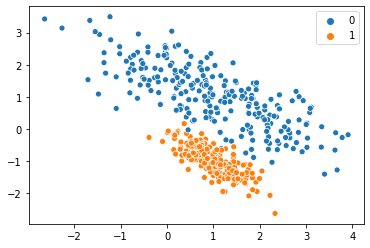

In [23]:
x, y = make_classification(n_samples=500, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1)
scatterplot(x[:, 0], x[:, 1], hue=y.reshape(-1))

In [48]:
class LogisticRegression:
    def __init__(self):
        return
    
    def cross_entropy(self):
        return np.sum(- self.y * np.log(expit(np.dot(self.w.T, self.x))) - (1 - self.y) * np.log(1 - expit(np.dot(self.w.R, self.x))))
    
    def g(self, w, x):
        return expit(np.dot(x, w))
    
    def gradient_descent(self):
        w_new = self.w
        for i in range(self.iterations):
            w_old = w_new
            w_new = w_old - self.learning_rate * np.dot((self.g(w_old, self.x) - self.y), x) / self.N
        return w_new
    
    def SGD(self):
        w_new = self.w
        for i in range(self.iterations):
            n = np.random.randint(0, self.N, 1)
            xi = self.x[n]
            yi = self.y[n]
            w_old = w_new
            w_new = w_old - self.learning_rate * np.dot((self.g(w_old, xi) - yi), xi)
        return w_new
    
    def fit(self, x, y, w0=None, learning_rate=0.01, iterations=10000):
        self.x = x
        self.y = y
        self.N = np.size(y)
        self.learning_rate = learning_rate
        self.iterations = iterations
        if w0 is not None:
            self.w = w0
        else:
            self.w = np.random.rand(np.size(x, 1))
        
        # self.w = self.gradient_descent()
        self.w = self.SGD()
        return self.w
    
    def predict(self, x):        
        return np.round(self.g(self.w, x))
    
    def score(self, x, y):
        ypredict = self.predict(x)
        return np.sum(ypredict == y) / np.size(y)

In [49]:
clf = LogisticRegression()
w = clf.fit(x, y)
w

array([-1.66026738, -4.61244476])

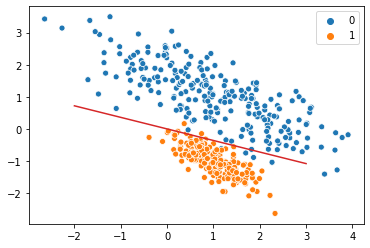

In [50]:
scatterplot(x[:, 0], x[:, 1], hue=y.reshape(-1))
x1 = np.linspace(-2, 3, num=100)
y1 = (- w[0] * x1) / w[1]
plt.plot(x1, y1, color="tab:red")

In [51]:
clf.predict(x)
clf.score(x, y)

0.98

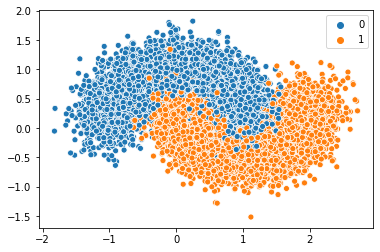

In [60]:
x, y = make_moons(n_samples=10000, noise=0.25, random_state=None)
scatterplot(x[:, 0], x[:, 1], hue=y.reshape(-1))

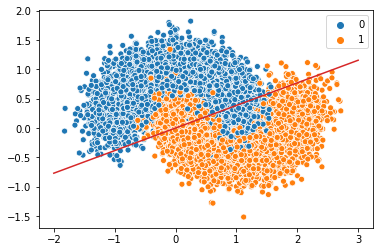

In [61]:
clf = LogisticRegression()
w = clf.fit(x, y)
scatterplot(x[:, 0], x[:, 1], hue=y.reshape(-1))
x1 = np.linspace(-2, 3, num=100)
y1 = (- w[0] * x1) / w[1]
plt.plot(x1, y1, color="tab:red")

## Dimensionality reduction